In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

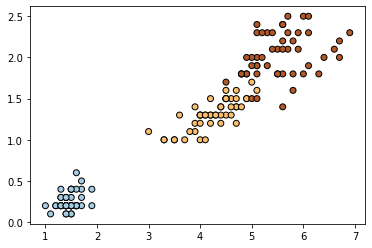

In [2]:
iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
X = iris.data[:, 2:4]  # we only take the first two features.
Y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

### Framework c-means fuzzy
Let $x_j$ be a datum of the set $X = \{ x_1, x_2, \ldots, x_n \}, X  \subset \mathbb{R}^p$, let $c$ be the
number of clusters $(1 < c < n)$ and $\mu_{\Gamma} = \{\mu_{\Gamma_1}, \ldots , \mu_{\Gamma_c}\}$ represents fuzzy sets. The membership degree of $x_j$ to $\Gamma_i$ is determined vy $ u_{i,j} = \mu_{\Gamma_i}(x_j) \in [0, 1]$. The fuzzy label vector $u = (u_{1j} , \ldots, u_{cj})^T$ is linked to each $x_j$ with respect to center vectors $Ci= (\boldsymbol{c}_i )$. $U = (u_{ij}) = (u_1,\ldots, u_n)$ is called fuzzy partition matrix. form probabilistic vision, cluster partition of X if

$$\begin{equation*}
\sum_{j=1}^{n}{u_{ij}}>0, \forall i \in \{ 1,\ldots, c \}, \text{  and} \newline \sum_{j=1}^{n}{u_{ij}}=1 \forall j \in \{ 1,\ldots, n \}
\end{equation*}$$

Cost function depend of $U$ and $C$ and the optimization resulting is by two steps [Bezdek, 1981]:

<b>First step </b>. The equation for the membership degrees:
$$u_{ij} = \frac{{d_{i,j}}^{\frac{2}{1-m}}}{\sum_{k=1}^{c}{d_{i,j}}^{\frac{2}{1-m}}}$$

$$(\forall i) (1\leq i \leq c) , \quad (\forall j ) (1\leq i \leq n), \quad d=\text{euclidian distance}$$

<b>Second step</b>. The mean minimizes the sum of square distances in cost function 

$$\begin{equation*}
\boldsymbol{c}_i= \frac{\sum_{j=1}^{n}{u_{ij}^m}\boldsymbol{x}_j}{\sum_{j=1}^{n}{u_{ij}^m}}
\end{equation*}$$

where parameter $m \in \mathbb{R}$ with $m > 1$ is the fuzzifier and $d_{ij} = d(c_i , x_j )$ is a euclidan distance.

In [3]:
n = len(X) #number of data
k=3 #number of clusters
d=2 #dimension of cluster
m=2 # m Fuzzifiers
itera=20 #number of iterations
xa=int(np.ceil(itera/3)) # number of axes
C=np.zeros((k,d))
ind=np.arange(n)
indx=np.random.choice(ind, k, replace=False)
C=X[indx,:]
print(C.shape)
print(C)
C[0,0]=2
C[1,0]=4
C[2,0]=7
C[0,1]=2
C[1,1]=0
C[2,1]=0

(3, 2)
[[4.2 1.5]
 [4.7 1.6]
 [1.5 0.1]]


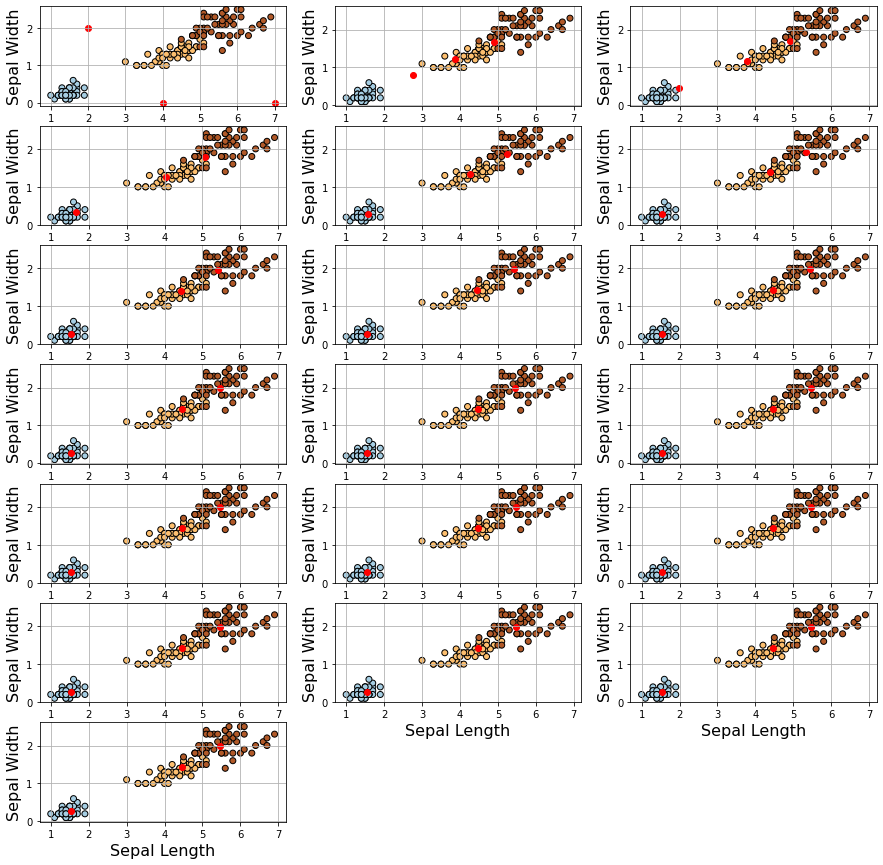

In [4]:
plt.figure(0,figsize=(15,15))  
plt.subplot(xa,3,1)              #scatter plot of sepal length vs sepal width                              
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
for center in C:
    plt.scatter(center[0],center[1], marker='o',color='r')        
plt.axis('equal')                                                                 
plt.xlabel('Sepal Length', fontsize=16)                                                 
plt.ylabel('Sepal Width', fontsize=16)                                                                                      
plt.grid() 

u=np.zeros((k,n))
denom= np.zeros(n)

for ite in range(2,itera):
    for i in range(k):
        u[i,:]= np.power(np.sqrt(np.sum((X-C[i,:]+1e-17)**2,axis=1)),1/(1-m)) 
    denom  = np.sum(u,axis=0)

    u=u/denom
    for i in range(k):
        up=np.power(u[i,:,np.newaxis],m)
        C[i,:] = np.sum(up*X,axis=0)/np.sum(up)

    plt.subplot(xa,3,ite)              #scatter plot of sepal length vs sepal width                              
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    for center in C:
        plt.scatter(center[0],center[1], marker='o',color='r')        
    plt.axis('equal')                                                                 
    plt.xlabel('Sepal Length', fontsize=16)                                                 
    plt.ylabel('Sepal Width', fontsize=16)                                                                                      
    plt.grid()     

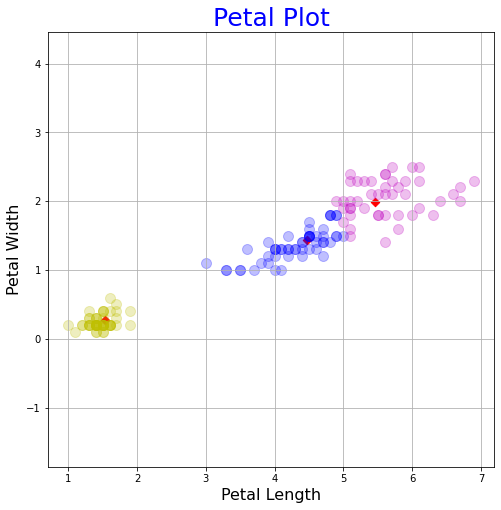

In [5]:
plt.figure(0,figsize=(8,8))                #scatter plot of sepal length vs sepal width                                     
plt.axis('equal')                                                                 
plt.xlabel('Petal Length', fontsize=16)                                                 
plt.ylabel('Petal Width', fontsize=16)                                                 
plt.title('Petal Plot', fontsize=25,color='b')                                            
plt.grid() 
for center in C:
  plt.scatter(center[0],center[1], marker='D',color='r')                                                                
clr = 'b'
for i in range(n):    
    cN  = np.argmax(u[:,i])
    if cN ==0:
      clr = 'y'
    elif cN ==1:
      clr = 'b'
    elif cN ==2:
      clr = 'm'
    plt.scatter(X[i, 0], X[i, 1], alpha=0.25, s=100, color=clr)
plt.show()

In [6]:
u=np.zeros((k,n))
denom= np.zeros(n)
for iter in range(10):
    for i in range(k):
            u[i,:]= np.power(np.sqrt(np.sum((X-C[i,:]+1e-17)**2,axis=1)),1/(1-m)) 
    u=u/np.sum(u,axis=0)
    for i in range(k):
        up=np.power(u[i,:,np.newaxis],m)
        C[i,:] = np.sum(up*X,axis=0)/np.sum(up)